## 2. Data frame and probabilities


In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('../Data/US-MMS_short.csv')

## Calculate the mean and standard deviation of each column

In [2]:
df.head()

# df.mean()
# df.std()
# df.max()


,YEAR,MONTH,DAY,HOUR,TA,PA,P,WS,RH,SWC,G,LE,H,NEE,GPP,USTAR,SW_NET,LW_NET,LAI,GA
0,2003,1,1,1,2.002,97.4,0.1,4.24,83.63,47.0,-4.632,3.321300,-39.9312,0.662678,0.0,0.668,0.419,1.4,0.489881,5.539262
1,2003,1,1,2,1.205,97.3,0.8,4.63,91.97,47.0,-5.075,5.979780,-66.9933,1.156150,0.0,0.688,0.927,1.8,0.489860,5.492919
2,2003,1,1,3,0.836,97.2,0.7,5.45,92.56,47.0,-5.945,-4.503500,-71.0931,0.567972,0.0,0.848,0.910,3.2,0.489840,7.289668
3,2003,1,1,4,0.632,97.2,0.8,5.21,92.76,48.0,-6.730,0.394589,-75.0968,0.443852,0.0,0.793,1.036,2.6,0.489819,6.646328
4,2003,1,1,5,0.326,97.1,0.9,5.02,95.70,49.0,-7.337,-1.880010,-51.4169,0.500611,0.0,0.785,0.393,2.0,0.489799,6.811513


## Filter out temperature (1) of September and (2) higher than 0, respectively

In [3]:
sept_filter = df['MONTH']==9
#print(sept_filter)

df_sept = df[sept_filter]

# equivalent to 
df_sept = df[df['MONTH']==9]

#print(len(df))
#print(len(df_sept))


# df_sept.head()
#print(df_sept)

## Calculate the average September temperatue
#print(df_sept.mean())

## Filter out the temperature higher than zero, calculate the avera
df_temp = df[df['TA']>0]

print(len(df_temp))
print(df_temp.min())

## Calculate the daytime (Radiation, SW_NET>0) average temperature in September
df_sept_day = df[(df['MONTH']==9) * (df['SW_NET']>0)]
print(df_sept_day.mean())


88558
YEAR      2003.000000
MONTH        1.000000
DAY          1.000000
HOUR         0.000000
TA           0.002000
PA          94.700000
P            0.000000
WS           0.000000
RH          13.270000
SWC         10.000000
G          -30.330000
LE        -200.879000
H         -388.314000
NEE        -65.473000
GPP          0.000000
USTAR        0.001000
SW_NET      -7.310000
LW_NET    -702.274200
LAI          0.406897
GA           0.002697
dtype: float64
YEAR      2008.548660
MONTH        9.000000
DAY         15.449897
HOUR        11.923093
TA          20.617951
PA          98.473091
P            0.113548
WS           2.896775
RH          70.022592
SWC         26.518815
G            1.497202
LE         156.442120
H           78.042013
NEE         -8.272935
GPP         12.684427
USTAR        0.432702
SW_NET     288.410635
LW_NET     -56.886531
LAI          3.564246
GA          25.005304
dtype: float64


## Plot out the time series of temperature

Text(0, 0.5, 'Net ecosystem exchange (umol/m2/s)')

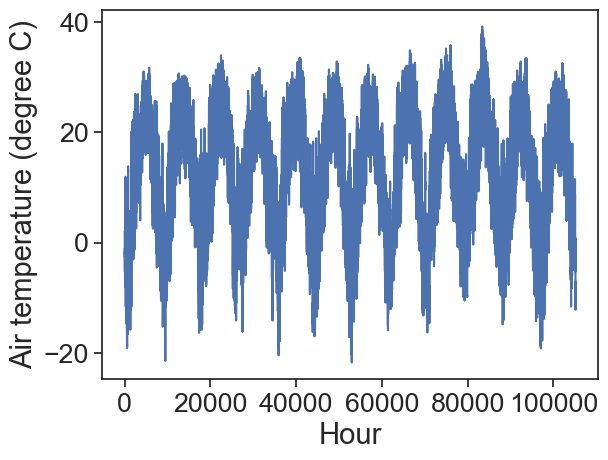

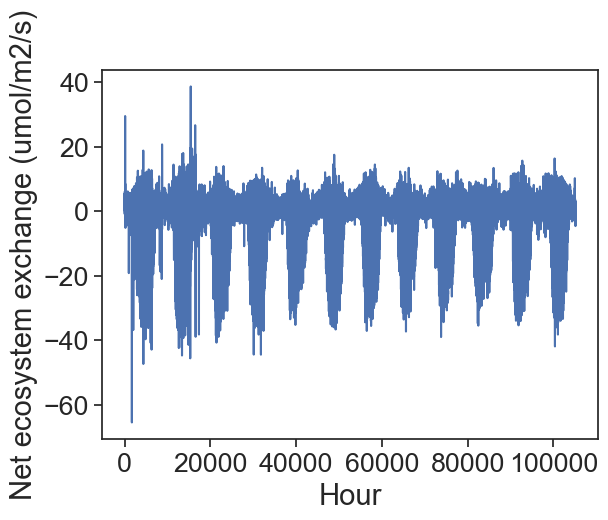

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'ticks',font_scale=1.75)

# plt.plot(df_sept['TA'])

## The complete record
plt.figure(); plt.plot(df['TA'])
plt.xlabel('Hour'); plt.ylabel('Air temperature (degree C)')

plt.figure(); plt.plot(df['NEE'])
plt.xlabel('Hour'); plt.ylabel('Net ecosystem exchange (umol/m2/s)')


## Temperature in a day

## Handle time stamps

2022-09-01 13:25:00
2003


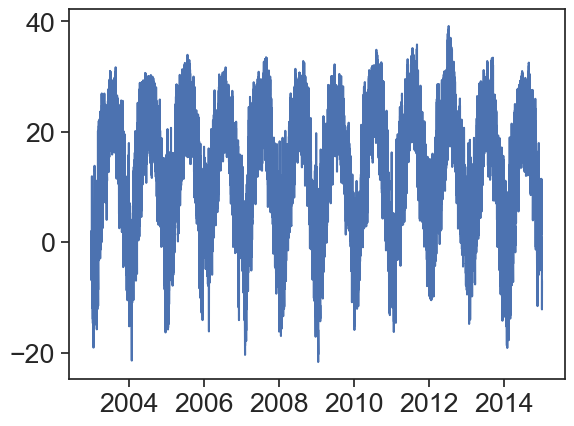

In [19]:
# For times tamps
import datetime
print(datetime.datetime(2022,9,1,13,25))


## Write the first datetime in the dateframe

## Write a for loop to generate a list of time stamps

tt = [datetime.datetime(df['YEAR'].iloc[i],df['MONTH'].iloc[i],df['DAY'].iloc[i],
                       df['HOUR'].iloc[i]) for i in range(len(df))]
# for i in range(len(df)):

print(df['YEAR'].iloc[0])

## Plot a time series of temperature with the x-axis being the time 

plt.plot(tt,df['TA'])



## How many hours rained? 


105191 6725 0.06393132492323488


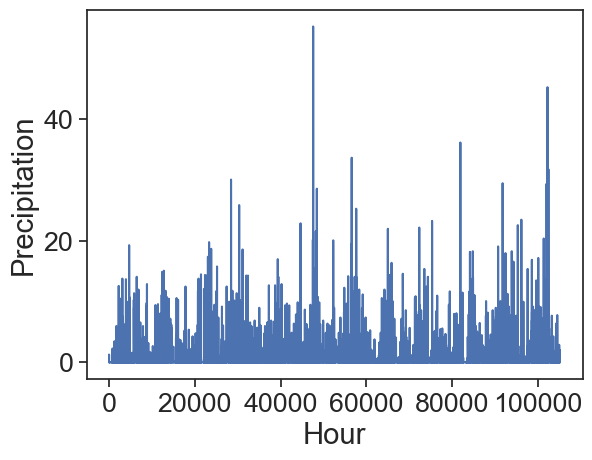

In [6]:
plt.plot(df['P'])
plt.xlabel('Hour');plt.ylabel('Precipitation')

## How many hours are there in the dataframe?
N = len(df)

## How many hours rained?  (P>0.1)
N_rain = len(df[df['P']>0.1])

## What is the probabiliy of an rainy hour? 

Pr = N_rain/N

print(N,N_rain,Pr)


## Calculate daily temperature

4382
(105168,) (4382, 24)
(4382,)


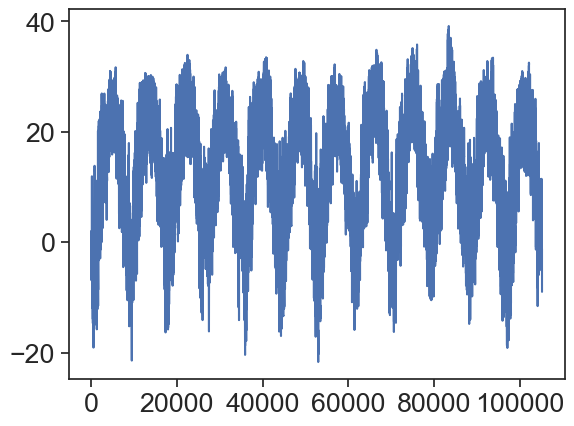

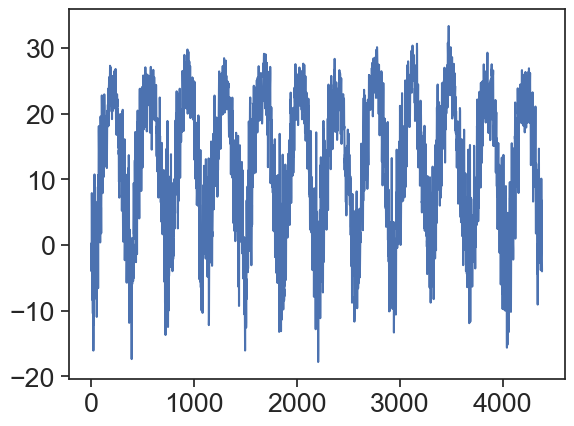

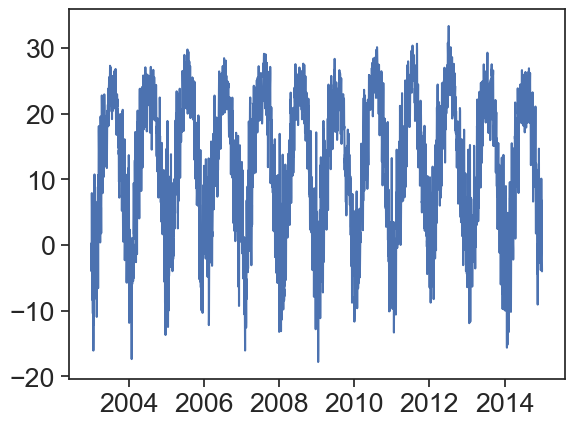

In [25]:
## How many days are there in the dataframe?

TA = df['TA'].values

windowsize = 24

Ndays = len(df)//windowsize; print(Ndays)

TA = TA[0:Ndays*windowsize]

## Reshape the array
TA_2d = np.reshape(TA,[Ndays,windowsize])
print(TA.shape, TA_2d.shape)

## Array average
TA_daily = np.mean(TA_2d,axis=1)
print(TA_daily.shape)

plt.figure();plt.plot(TA)
plt.figure();plt.plot(TA_daily)


plt.figure();
plt.plot(tt[::24][:len(TA_daily)],TA_daily)

## Define a function to calculate daily averages from houly time series

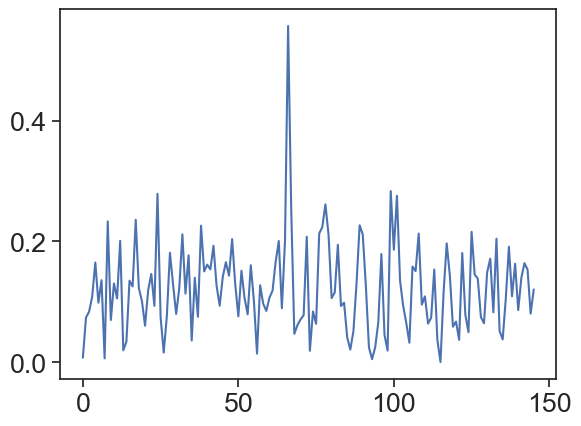

In [8]:
## Define function

def dailyAvg(a,windowsize):
    Ndays = len(a)//windowsize
    a = a[0:Ndays*windowsize]
    a_daily = np.mean(np.reshape(a,[Ndays,windowsize]),axis=1)
    return a_daily

# ## Call the function
TA_daily2 = dailyAvg(df['TA'].values,24) 
P_daily = dailyAvg(df['P'].values,24) 
P_weekly = dailyAvg(df['P'].values,24*7) 
P_monthly = dailyAvg(df['P'].values,24*30) 


## Visualize the daily time series
plt.plot(P_monthly)




## Calculate the averegae diurnal/seasonal cycle

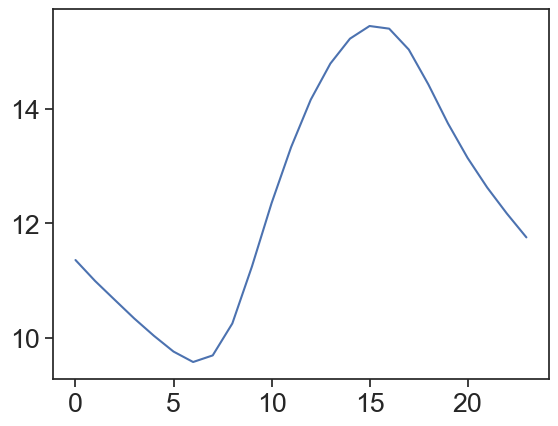

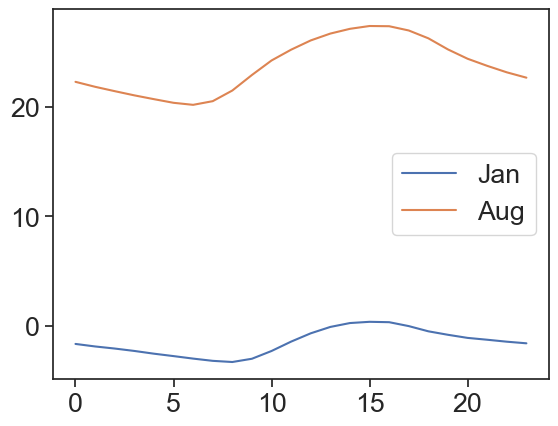

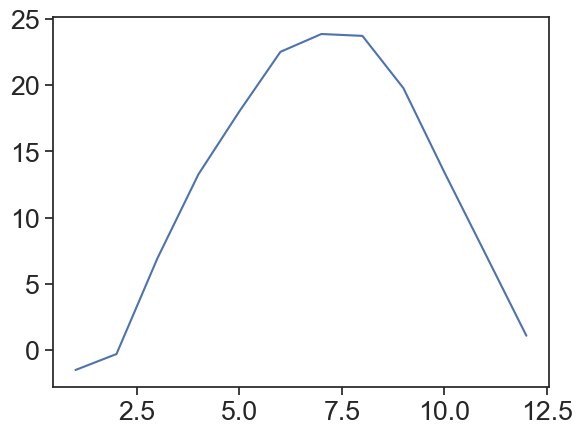

In [9]:
diurnal_cycle_T = df.groupby('HOUR').mean()
# print(diurnal_cycle_T)
plt.plot(diurnal_cycle_T['TA'])

# Average diurnal cycles in January and August
# jan_filter = df['MONTH']==1
# df_jan = df[jan_filter]

#df_jan = df[df['MONTH']==1]
#diurnal_cycle_T_jan = df_jan.groupby('HOUR').mean()

diurnal_cycle_T_jan = df[df['MONTH']==1].groupby('HOUR').mean()['TA']
diurnal_cycle_T_aug = df[df['MONTH']==8].groupby('HOUR').mean()['TA']
plt.figure()
plt.plot(diurnal_cycle_T_jan,label='Jan')
plt.plot(diurnal_cycle_T_aug,label='Aug')
plt.legend()

seasonal_cycle_T = df.groupby('MONTH').mean()['TA']
plt.figure()
plt.plot(seasonal_cycle_T)

## Plot the histogram of daily air temperature

Text(0, 0.5, 'PDF')

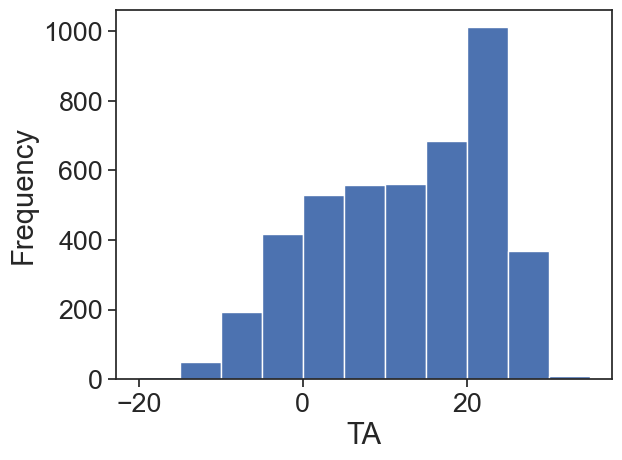

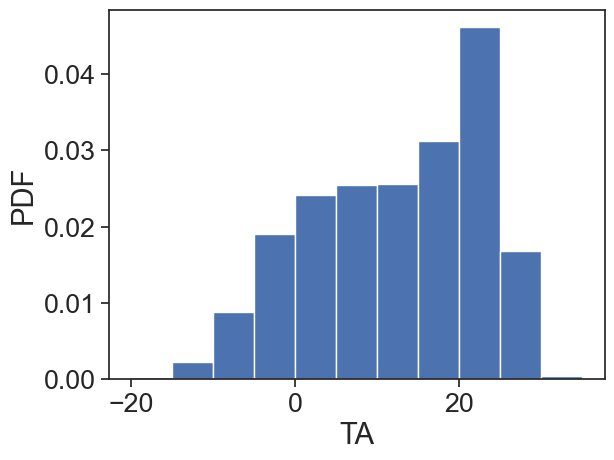

In [10]:
# plt.plot(TA_daily)

plt.figure()
plt.hist(TA_daily,bins=np.arange(-20,40,5))
plt.xlabel('TA'); plt.ylabel('Frequency')

plt.figure()
plt.hist(TA_daily,bins=np.arange(-20,40,5),density=True)
plt.xlabel('TA'); plt.ylabel('PDF')

## Calculate the average and standard deviation of the daily temperature

## Fit a Gaussian distribution for daily temperature

[-25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8
  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7   8   9  10
  11  12  13  14  15  16  17  18  19  20  21  22  23  24]
12.400291219762666 10.375899685866651
0.7978092195344592
0.8419128992019247
12.400291219762666 10.375899685866651


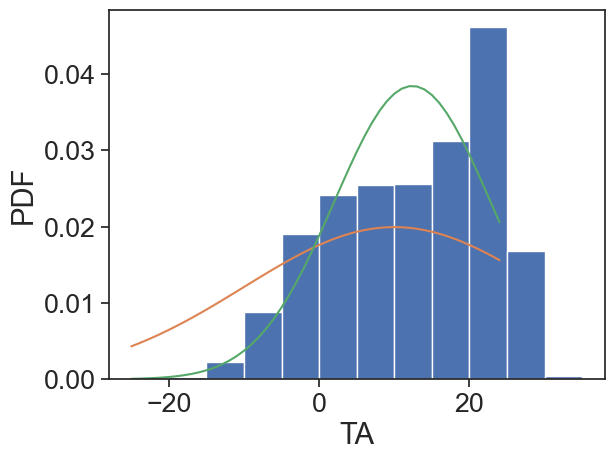

In [43]:
from scipy import stats
# import scipy
ta_range = np.arange(-25,25,1)
print(ta_range)
ta_pdf = stats.norm.pdf(ta_range, 10,20)

plt.figure()
plt.hist(TA_daily,bins=np.arange(-20,40,5),density=True)
plt.xlabel('TA'); plt.ylabel('PDF')
plt.plot(ta_range,ta_pdf)


## Compare the histogram and the fitted pdf
mu, sigma = stats.norm.fit(TA_daily)
print(mu, sigma)
ta_pdf_new = stats.norm.pdf(ta_range,mu,sigma)
plt.plot(ta_range,ta_pdf_new)

# print(np.mean(TA_daily),np.std(TA_daily))

# what is the probability of TA higher than2?

# Approach 1:
print(len(TA_daily[TA_daily>2])/len(TA_daily))

# Approach 2:
# 1-cdf(0)
print(1-stats.norm.cdf(2,mu,sigma))
print(mu,sigma)

In [12]:
## Fit normal distribution in another way

# m,s = stats.norm.fit()

# pdf_ta = stats.norm.pdf()

